In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Airbnb training dataset
df = pd.read_csv("Data/train.csv")


In [3]:
# Display data type of each column
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

id: int64
name: object
description: object
neighborhood_overview: object
host_id: int64
host_name: object
host_since: object
host_location: object
host_about: object
host_response_time: object
host_response_rate: object
host_acceptance_rate: object
host_is_superhost: object
host_neighbourhood: object
host_listings_count: float64
host_total_listings_count: float64
host_verifications: object
host_has_profile_pic: object
host_identity_verified: object
neighbourhood: object
neighbourhood_cleansed: object
latitude: float64
longitude: float64
property_type: object
room_type: object
accommodates: int64
bathrooms: float64
bathrooms_text: object
bedrooms: float64
beds: float64
amenities: object
price: float64
has_availability: object
availability_30: int64
availability_60: int64
availability_90: int64
availability_365: int64
number_of_reviews: int64
number_of_reviews_ltm: int64
number_of_reviews_l30d: int64
availability_eoy: float64
number_of_reviews_ly: float64
estimated_occupancy_l365d: float

In [4]:
df.shape      

(261894, 55)

In [5]:
df.head()   

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
0,1234376912864523021,Spacious Garden Apt in Center Square,Nestled in the vibrant heart of the historic C...,NaN,564967431,Stephanie,2024-03-02,NaN,NaN,within an hour,...,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany
1,887167811237271928,The Comfort II,Your family will be close to everything when y...,NaN,459472925,Gabriel,2022-05-16,"Albany, NY",NaN,within a few hours,...,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany
2,938271786418327576,Knickerbocker 3 The Argus Hotel,Large queen room with queen pull out couch loc...,The Argus Hotel is located directly on Washing...,526358730,Argus,2023-07-17,NaN,NaN,within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany
3,898743867240851780,"Airy 5Br-2Ba,Kids Rm, 6TVs,Pvt Fence-yard&Park...","Whatever brings you to Albany, New York – wish...",NaN,516414095,Rashawn,2023-05-24,"Albany, NY",NaN,within an hour,...,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany
4,1005978346817864540,Massive 4BD/3BA 2-Fl Townhouse Apt Downtown Al...,Stay in our 4-bedroom townhouse-style 2-story ...,+ 92 Walkscore<br />+ 5-minute walk to MVP Are...,44434571,Earl,2015-09-17,NaN,"I grew up in Cebu, Philippines and moved to Ne...",within an hour,...,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany


In [6]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261894 entries, 0 to 261893
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           261894 non-null  int64  
 1   name                         261894 non-null  object 
 2   description                  255801 non-null  object 
 3   neighborhood_overview        127687 non-null  object 
 4   host_id                      261894 non-null  int64  
 5   host_name                    261780 non-null  object 
 6   host_since                   261771 non-null  object 
 7   host_location                195064 non-null  object 
 8   host_about                   135708 non-null  object 
 9   host_response_time           221647 non-null  object 
 10  host_response_rate           221647 non-null  object 
 11  host_acceptance_rate         239348 non-null  object 
 12  host_is_superhost            254521 non-null  object 
 13 

In [7]:
# Check for null values and sort by most missing
null_values = df.isnull().sum().reset_index()
null_values.columns = ['Column', 'Missing Values']
null_values = null_values[null_values['Missing Values'] > 0]  # only show columns with missing values
null_values = null_values.sort_values(by='Missing Values', ascending=False)

null_values


,Column,Missing Values
13,host_neighbourhood,158979
40,availability_eoy,139665
42,estimated_occupancy_l365d,139665
43,estimated_revenue_l365d,139665
41,number_of_reviews_ly,139665
3,neighborhood_overview,134207
19,neighbourhood,134206
8,host_about,126186
7,host_location,66830
49,review_scores_checkin,50967


In [8]:
# Drop columns that are IDs, text-heavy, or cause leakage for demand prediction
drop_cols = [
    # Identifiers
    'id', 'host_id',
    
    # High-cardinality / free text
    'name', 'description', 'neighborhood_overview', 'host_name',
    'host_about', 'host_location', 'host_neighbourhood','neighbourhood',
    
   
    # Leakage from target (revenue is highly correlated with occupancy)
    'estimated_revenue_l365d'
]

df= df.drop(columns=drop_cols, errors='ignore')

print("Shape after drop:", df.shape)
pd.set_option('display.max_columns', None)
df.head()


Shape after drop: (261894, 44)


,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
0,2024-03-02,within an hour,100%,88%,f,2.0,2.0,"['email', 'phone']",t,t,SIXTH WARD,42.650468,-73.764348,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany
1,2022-05-16,within a few hours,90%,57%,f,2.0,2.0,['phone'],t,t,THIRD WARD,42.662460,-73.765760,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany
2,2023-07-17,within an hour,80%,98%,f,12.0,13.0,"['email', 'phone']",t,f,SIXTH WARD,42.658680,-73.773330,Room in hotel,Private room,2,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Fir...",243.0,t,26,52,81,340,0,0,0,281.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany
3,2023-05-24,within an hour,100%,97%,t,1.0,2.0,"['email', 'phone']",t,t,TENTH WARD,42.660870,-73.786550,Entire home,Entire home/apt,11,2.0,2 baths,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany
4,2015-09-17,within an hour,100%,99%,f,10.0,10.0,"['email', 'phone']",t,t,SECOND WARD,42.645349,-73.753647,Entire rental unit,Entire home/apt,12,3.0,3 baths,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany


In [9]:
df.isnull().sum()

host_since                        123
host_response_time              40247
host_response_rate              40247
host_acceptance_rate            22546
host_is_superhost                7373
host_listings_count               123
host_total_listings_count         123
host_verifications                123
host_has_profile_pic              123
host_identity_verified            123
neighbourhood_cleansed           8693
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                         125
bathrooms_text                    234
bedrooms                          352
beds                              490
amenities                           0
price                               0
has_availability                 2286
availability_30                     0
availability_60                     0
availability_90                     0
availability

#### In the data we see that the huge missing data for estimated_occupancy_l365d  is a city phenomenon, i.e. that either the values are present for the whole city, or none at all.

Target varibale is estimated_occupancy_l365d for demand, so will need to drop all containing null

In [10]:
# Drop rows with no target value
df = df.dropna(subset=['estimated_occupancy_l365d']).copy()

print("Shape after drop:", df.shape)

# Check missing counts again
df.isnull().sum()


Shape after drop: (122229, 44)


host_since                       105
host_response_time             12887
host_response_rate             12887
host_acceptance_rate            8723
host_is_superhost               4021
host_listings_count              105
host_total_listings_count        105
host_verifications               105
host_has_profile_pic             105
host_identity_verified           105
neighbourhood_cleansed           234
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         49
bathrooms_text                    87
bedrooms                         179
beds                             240
amenities                          0
price                              0
has_availability                 903
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
n

In [11]:
df

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
0,2024-03-02,within an hour,100%,88%,f,2.0,2.0,"['email', 'phone']",t,t,SIXTH WARD,42.650468,-73.764348,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany
1,2022-05-16,within a few hours,90%,57%,f,2.0,2.0,['phone'],t,t,THIRD WARD,42.662460,-73.765760,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany
2,2023-07-17,within an hour,80%,98%,f,12.0,13.0,"['email', 'phone']",t,f,SIXTH WARD,42.658680,-73.773330,Room in hotel,Private room,2,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Fir...",243.0,t,26,52,81,340,0,0,0,281.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany
3,2023-05-24,within an hour,100%,97%,t,1.0,2.0,"['email', 'phone']",t,t,TENTH WARD,42.660870,-73.786550,Entire home,Entire home/apt,11,2.0,2 baths,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany
4,2015-09-17,within an hour,100%,99%,f,10.0,10.0,"['email', 'phone']",t,t,SECOND WARD,42.645349,-73.753647,Entire rental unit,Entire home/apt,12,3.0,3 baths,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261889,2015-09-17,NaN,NaN,80%,t,1.0,1.0,"['email', 'phone']",t,t,Fort Rouge - East Fort Garry,49.864520,-97.155440,Entire home,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Smoke alarm"", ""Extra pillows and blankets"", ...",95.0,t,0,0,0,65,10,1,0,65.0,1.0,60.0,2022-05-12,2024-03-14,4.90,5.00,4.90,4.90,5.00,5.00,4.80,0.29,Winnipeg
261890,2015-11-13,within an hour,100%,98%,t,2.0,2.0,"['email', 'phone']",t,t,River Heights - Fort Garry,49.852131,-97.198829,Entire home,Entire home/apt,6,1.0,1 bath,3.0,4.0,"[""Patio or balcony"", ""Smoke alarm"", ""Extra pil...",164.0,t,28,39,39,42,4,4,1,42.0,1.0,40.0,2024-12-27,2025-03-02,5.00,5.00,5.00,5.00,5.00,5.00,4.75,1.67,Winnipeg
261891,2018-10-07,within an hour,100%,78%,t,4.0,5.0,"['email', 'phone']",t,f,River Heights - Fort Garry,49.840440,-97.157760,Entire townhouse,Entire home/apt,5,1.0,1 bath,2.0,2.0,"[""Air conditioning"", ""Dining table"", ""Room-dar...",83.0,t,30,60,90,175,55,35,2,175.0,39.0,210.0,2022-12-13,2025-02-23,4.89,4.91,4.89,4.91,5.00,4.85,4.76,2.02,Winnipeg
261892,2019-08-19,within an hour,100%,95%,t,3.0,3.0,"['email', 'phone']",t,t,St. Vital,49.823470,-97.055070,Entire guest suite,Entire home/apt,5,1.0,1 bath,2.0,2.0,"[""Books and reading material"", ""Dining table"",...",117.0,t,24,46,62,268,41,8,0,203.0,7.0,48.0,2021-08-18,2025-01-04,4.90,4.88,5.00,4.95,5.00,4.90,4.85,0.95,Winnipeg


In [12]:
# Host_since
# Convert to datetime
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# Find most recent date in the data
most_recent_date = df['host_since'].max()

# Calculate days since most recent host start
df['host_tenure_days'] = (most_recent_date - df['host_since']).dt.days

print("Most recent host_since date:", most_recent_date)
median_tenure = df['host_tenure_days'].median()
df['host_tenure_days'] = df['host_tenure_days'].fillna(median_tenure)

df.drop(columns=['host_since'], inplace=True)
df[['host_tenure_days']].head()




Most recent host_since date: 2025-03-11 00:00:00


,host_tenure_days
0,374.0
1,1030.0
2,603.0
3,657.0
4,3463.0


In [13]:
for col in ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost']:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))



--- host_response_time ---
within an hour        86286
within a few hours    13405
NaN                   12887
within a day           7195
a few days or more     2456
Name: host_response_time, dtype: int64

--- host_response_rate ---
100%    85720
NaN     12887
99%      4397
98%      2332
97%      1783
        ...  
5%          1
52%         1
27%         1
12%         1
34%         1
Name: host_response_rate, Length: 96, dtype: int64

--- host_acceptance_rate ---
100%    46037
99%     12579
NaN      8723
98%      6732
97%      4931
        ...  
7%         31
6%         25
3%         24
2%         10
1%          8
Name: host_acceptance_rate, Length: 102, dtype: int64

--- host_is_superhost ---
f      72245
t      45963
NaN     4021
Name: host_is_superhost, dtype: int64


In [14]:
## encoding all above 4

# host_response_time
response_time_map = {
    'within an hour': 1,
    'within a few hours': 4,
    'within a day': 24,
    'a few days or more': 72
}
df['host_response_time'] = df['host_response_time'].map(response_time_map)

# Fill NaN with median
median_time = df['host_response_time'].median()
df['host_response_time'] = df['host_response_time'].fillna(median_time)

# -------------------------------
#host_response_rate
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=False).astype(float)

# Fill NaN with median rate
median_rate = df['host_response_rate'].median()
df['host_response_rate'] = df['host_response_rate'].fillna(median_rate)

# --------------------------------
#host_acceptance_rate

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '', regex=False).astype(float)

# Fill NaN with median rate
median_acceptance = df['host_acceptance_rate'].median()
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(median_acceptance)

# --------------------------------

#host_is_superhost

df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})

# Fill NaN with mode
mode_superhost = df['host_is_superhost'].mode()[0]
df['host_is_superhost'] = df['host_is_superhost'].fillna(mode_superhost)




In [15]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city,host_tenure_days
0,1.0,100.0,88.0,0.0,2.0,2.0,"['email', 'phone']",t,t,SIXTH WARD,42.650468,-73.764348,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany,374.0
1,4.0,90.0,57.0,0.0,2.0,2.0,['phone'],t,t,THIRD WARD,42.662460,-73.765760,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany,1030.0
2,1.0,80.0,98.0,0.0,12.0,13.0,"['email', 'phone']",t,f,SIXTH WARD,42.658680,-73.773330,Room in hotel,Private room,2,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Fir...",243.0,t,26,52,81,340,0,0,0,281.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany,603.0
3,1.0,100.0,97.0,1.0,1.0,2.0,"['email', 'phone']",t,t,TENTH WARD,42.660870,-73.786550,Entire home,Entire home/apt,11,2.0,2 baths,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany,657.0
4,1.0,100.0,99.0,0.0,10.0,10.0,"['email', 'phone']",t,t,SECOND WARD,42.645349,-73.753647,Entire rental unit,Entire home/apt,12,3.0,3 baths,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany,3463.0


In [16]:
for col in ['host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed']:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))



--- host_verifications ---
['email', 'phone']                    95507
['email', 'phone', 'work_email']      15638
['phone']                             10073
['phone', 'work_email']                 761
['email']                               112
NaN                                     105
[]                                       27
['email', 'work_email']                   3
['email', 'phone', 'photographer']        2
['work_email']                            1
Name: host_verifications, dtype: int64

--- host_has_profile_pic ---
t      118210
f        3914
NaN       105
Name: host_has_profile_pic, dtype: int64

--- host_identity_verified ---
t      113519
f        8605
NaN       105
Name: host_identity_verified, dtype: int64

--- neighbourhood_cleansed ---
Unincorporated Areas                                    2397
Centro Storico                                          2207
Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória    1765
Primary Urban Center                            

In [17]:

# 1. host_verifications → count
def count_verifications(x):
    if pd.isnull(x) or x == '[]':
        return 0
    try:
        return len(eval(x))
    except:
        return 0

df['host_verifications_count'] = df['host_verifications'].apply(count_verifications)
df['host_verifications_count'] = df['host_verifications_count'].fillna(0)

# 2. host_has_profile_pic → binary
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0])

# 3. host_identity_verified → binary
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0])


df.drop(columns=['host_verifications', 'neighbourhood_cleansed'], inplace=True)

print("Dropped columns: host_verifications, neighbourhood_cleansed")


Dropped columns: host_verifications, neighbourhood_cleansed


In [18]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city,host_tenure_days,host_verifications_count
0,1.0,100.0,88.0,0.0,2.0,2.0,1.0,1.0,42.650468,-73.764348,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany,374.0,2
1,4.0,90.0,57.0,0.0,2.0,2.0,1.0,1.0,42.662460,-73.765760,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany,1030.0,1
2,1.0,80.0,98.0,0.0,12.0,13.0,1.0,0.0,42.658680,-73.773330,Room in hotel,Private room,2,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Fir...",243.0,t,26,52,81,340,0,0,0,281.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany,603.0,2
3,1.0,100.0,97.0,1.0,1.0,2.0,1.0,1.0,42.660870,-73.786550,Entire home,Entire home/apt,11,2.0,2 baths,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany,657.0,2
4,1.0,100.0,99.0,0.0,10.0,10.0,1.0,1.0,42.645349,-73.753647,Entire rental unit,Entire home/apt,12,3.0,3 baths,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany,3463.0,2


In [19]:
for col in ['property_type', 'room_type', 'bathrooms_text']:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))



--- property_type ---
Entire rental unit             49141
Entire home                    19035
Entire condo                   11563
Private room in rental unit    10135
Private room in home            8115
                               ...  
Shepherd’s hut                     1
Shared room in kezhan              1
Private room in windmill           1
Private room in hut                1
Floor                              1
Name: property_type, Length: 116, dtype: int64

--- room_type ---
Entire home/apt    94645
Private room       26361
Hotel room           750
Shared room          473
Name: room_type, dtype: int64

--- bathrooms_text ---
1 bath               61786
2 baths              21314
1 private bath        9339
1 shared bath         8521
1.5 baths             5234
3 baths               4058
2.5 baths             3574
2 shared baths        1684
1.5 shared baths      1353
3.5 baths             1159
4 baths               1062
0 baths                456
0 shared baths         387

In [20]:
# List all unique property types with counts
property_counts = df['property_type'].value_counts(dropna=False)

# Show all rows without truncation
pd.set_option('display.max_rows', None)
print(property_counts)
pd.reset_option('display.max_rows')



Entire rental unit                    49141
Entire home                           19035
Entire condo                          11563
Private room in rental unit           10135
Private room in home                   8115
Entire guest suite                     2263
Entire guesthouse                      2180
Room in hotel                          2013
Entire serviced apartment              1823
Entire townhouse                       1763
Entire villa                           1653
Private room in bed and breakfast      1408
Private room in condo                  1327
Entire loft                            1292
Private room in townhouse               847
Entire cottage                          758
Room in boutique hotel                  647
Entire vacation home                    602
Entire cabin                            423
Tiny home                               367
Entire bungalow                         355
Private room in guest suite             350
Private room in guesthouse      

In [21]:
def map_property_type(pt):
    pt = pt.lower()
    
    # Apartments & similar
    if any(k in pt for k in ['rental unit', 'apartment', 'condo', 'loft', 'aparthotel', 'vacation home', 'tiny home', 'shipping container', 'floor']):
        return 'Apartment/Condo'
    
    # Houses & similar
    if any(k in pt for k in ['home', 'villa', 'townhouse', 'cottage', 'bungalow', 'chalet', 'farm stay', 'farmhouse', 'cabin', 'ranch']):
        return 'House'
    
    # Private rooms
    if pt.startswith('private room'):
        return 'Private Room'
    
    # Shared rooms
    if pt.startswith('shared room'):
        return 'Shared Room'
    
    # Hotels & specialty lodging
    if any(k in pt for k in ['hotel', 'resort', 'hostel', 'bed and breakfast', 'guesthouse', 'heritage hotel', 'holiday park', 'pension', 'minsu', 'ryokan']):
        return 'Hotel/Specialty'
    
    # Unique stays
    if any(k in pt for k in ['yurt', 'tent', 'dome', 'castle', 'treehouse', 'camper/rv', 'boat', 'houseboat', 'windmill', 'hut', 'tipi', 'train', 'bus', 'tower', 'cave', 'island', 'religious building', 'kezhan', 'nature lodge']):
        return 'Unique Stay'
    
    # Casa Particular & local styles
    if 'casa particular' in pt or 'riad' in pt or 'cycladic' in pt:
        return 'Local Specialty'
    
    # Default
    return 'Other'

# Apply mapping
df['property_grouped'] = df['property_type'].apply(map_property_type)

# Drop original property_type if not needed
df.drop(columns=['property_type'], inplace=True)

# Check result
print(df['property_grouped'].value_counts())


Apartment/Condo    77066
House              34024
Hotel/Specialty     5023
Private Room        2923
Other               2482
Unique Stay          455
Shared Room          210
Local Specialty       46
Name: property_grouped, dtype: int64


In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize encoder
encoder = OrdinalEncoder()

# Fit and transform
df['property_grouped_encoded'] = encoder.fit_transform(df[['property_grouped']])

# Drop original text column
df.drop(columns=['property_grouped'], inplace=True)

print("Encoding complete. Categories mapping:")
for cat, val in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
    print(f"{cat} → {val}")


Encoding complete. Categories mapping:
Apartment/Condo → 0
Hotel/Specialty → 1
House → 2
Local Specialty → 3
Other → 4
Private Room → 5
Shared Room → 6
Unique Stay → 7


In [23]:
import re
from sklearn.preprocessing import OrdinalEncoder

# Function to process the bathrooms_text column
def process_bathrooms(text):
    if pd.isna(text):
        return np.nan, 'Normal'

    text = str(text).lower().strip()

    if 'half-bath' in text:
        num_baths = 0.5
        bathroom_type = 'Normal'
    else:
        match = re.search(r'(\d+\.?\d*)', text)
        num_baths = float(match.group(1)) if match else np.nan

        if num_baths is not np.nan and num_baths > 5:
            num_baths = 6

        if 'shared' in text:
            bathroom_type = 'Shared'
        elif 'private' in text:
            bathroom_type = 'Private'
        else:
            bathroom_type = 'Normal'

    return num_baths, bathroom_type

# Apply the function to create new columns and drop the original text column
df[['bathrooms_count', 'bathroom_type']] = df['bathrooms_text'].apply(
    lambda x: pd.Series(process_bathrooms(x))
)

# Initialize and fit the OrdinalEncoder
encoder = OrdinalEncoder()
df['bathroom_type_encoded'] = encoder.fit_transform(df[['bathroom_type']])

# Drop the original text and intermediate categorical column for a cleaner final DataFrame
df.drop(columns=['bathrooms_text', 'bathroom_type'], inplace=True)

# Print the value counts of the newly created columns
print("Value counts for bathrooms_count:")
print(df['bathrooms_count'].value_counts())
print("\n" + "="*50 + "\n")

print("Value counts for bathroom_type_encoded:")
print(df['bathroom_type_encoded'].value_counts())
print("\n" + "="*50 + "\n")

# Print the head of the final DataFrame to show the new columns alongside the others
print("Head of the final DataFrame:")
print(df.head(10))

Value counts for bathrooms_count:
1.0    79646
2.0    22998
1.5     6587
3.0     4304
2.5     3787
3.5     1208
4.0     1128
0.0      843
0.5      624
6.0      387
4.5      324
5.0      306
Name: bathrooms_count, dtype: int64


Value counts for bathroom_type_encoded:
0.0    100268
2.0     12622
1.0      9339
Name: bathroom_type_encoded, dtype: int64


Head of the final DataFrame:
   host_response_time  host_response_rate  host_acceptance_rate  \
0                 1.0               100.0                  88.0   
1                 4.0                90.0                  57.0   
2                 1.0                80.0                  98.0   
3                 1.0               100.0                  97.0   
4                 1.0               100.0                  99.0   
5                 1.0               100.0                  97.0   
6                 1.0                90.0                  50.0   
7                 1.0               100.0                  98.0   
8             

In [24]:

# Define the mapping dictionary
room_type_mapping = {
    'Entire home/apt': 0,
    'Private room': 1,
    'Hotel room': 2,
    'Shared room': 3
}

# Apply the mapping to create a new encoded column
df['room_type_encoded'] = df['room_type'].map(room_type_mapping)

# Drop the original categorical column
df.drop(columns=['room_type'], inplace=True)
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city,host_tenure_days,host_verifications_count,property_grouped_encoded,bathrooms_count,bathroom_type_encoded,room_type_encoded
0,1.0,100.0,88.0,0.0,2.0,2.0,1.0,1.0,42.650468,-73.764348,2,1.0,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany,374.0,2,0.0,1.0,0.0,0
1,4.0,90.0,57.0,0.0,2.0,2.0,1.0,1.0,42.662460,-73.765760,1,1.0,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany,1030.0,1,0.0,1.0,2.0,1
2,1.0,80.0,98.0,0.0,12.0,13.0,1.0,0.0,42.658680,-73.773330,2,1.0,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Fir...",243.0,t,26,52,81,340,0,0,0,281.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany,603.0,2,1.0,1.0,0.0,1
3,1.0,100.0,97.0,1.0,1.0,2.0,1.0,1.0,42.660870,-73.786550,11,2.0,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany,657.0,2,2.0,2.0,0.0,0
4,1.0,100.0,99.0,0.0,10.0,10.0,1.0,1.0,42.645349,-73.753647,12,3.0,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany,3463.0,2,0.0,3.0,0.0,0


# Missing Value Transformation
* We Evaluate Missing values in each column
* Based on Similar groups of Missing Value , we dropped "Review_score_value" , ~5% of dataset
* 

In [25]:
# Check for null values and sort by most missing
null_values = df.isnull().sum().reset_index()
null_values.columns = ['Column', 'Missing Values']
null_values = null_values[null_values['Missing Values'] > 0]  # only show columns with missing values
null_values = null_values.sort_values(by='Missing Values', ascending=False)

null_values


,Column,Missing Values
35,review_scores_value,21512
32,review_scores_checkin,21512
34,review_scores_location,21511
31,review_scores_cleanliness,21510
30,review_scores_accuracy,21509
33,review_scores_communication,21509
29,review_scores_rating,21506
36,reviews_per_month,21505
27,first_review,21505
28,last_review,21505


In [26]:
df = df.dropna(subset=['review_scores_value'])

# Fill missing values in numeric columns with median
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# drop the missing value of "has_availability"
df = df.dropna(subset = ["has_availability"])
df.head(10)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city,host_tenure_days,host_verifications_count,property_grouped_encoded,bathrooms_count,bathroom_type_encoded,room_type_encoded
0,1.0,100.0,88.0,0.0,2.0,2.0,1.0,1.0,42.650468,-73.764348,2,1.0,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany,374.0,2,0.0,1.0,0.0,0
1,4.0,90.0,57.0,0.0,2.0,2.0,1.0,1.0,42.662460,-73.765760,1,1.0,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany,1030.0,1,0.0,1.0,2.0,1
3,1.0,100.0,97.0,1.0,1.0,2.0,1.0,1.0,42.660870,-73.786550,11,2.0,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany,657.0,2,2.0,2.0,0.0,0
4,1.0,100.0,99.0,0.0,10.0,10.0,1.0,1.0,42.645349,-73.753647,12,3.0,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany,3463.0,2,0.0,3.0,0.0,0
5,1.0,100.0,97.0,1.0,1.0,1.0,1.0,1.0,42.660100,-73.807190,2,1.0,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Cen...",72.0,t,16,46,70,249,56,19,0,249.0,21.0,114.0,2023-01-01,2025-01-29,4.88,4.93,4.89,4.98,4.98,4.95,4.86,2.12,Albany,2132.0,2,2.0,1.0,0.0,0
7,1.0,100.0,98.0,1.0,17.0,17.0,1.0,1.0,42.662570,-73.782810,6,1.0,3.0,3.0,"[""Microwave"", ""Cleaning products"", ""Free washe...",180.0,t,0,0,0,11,131,21,0,0.0,24.0,126.0,2020-07-05,2024-10-28,4.85,4.90,4.95,4.96,4.96,4.60,4.73,2.31,Albany,1735.0,2,2.0,1.0,0.0,0
8,1.0,100.0,100.0,1.0,1.0,1.0,1.0,1.0,42.644600,-73.758850,4,1.0,1.0,2.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",89.0,t,14,44,65,324,161,99,7,265.0,90.0,255.0,2023-04-07,2025-02-24,4.99,4.98,4.98,4.99,5.00,4.75,4.97,6.94,Albany,2918.0,3,2.0,1.0,1.0,1
9,1.0,100.0,91.0,0.0,4.0,7.0,1.0,0.0,42.653890,-73.765380,2,1.0,1.0,1.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",130.0,t,0,9,38,38,6,4,0,38.0,5.0,24.0,2023-03-20,2024-10-21,5.00,5.00,4.83,4.83,5.00,4.67,4.33,0.25,Albany,4772.0,2,0.0,1.0,0.0,0
10,24.0,100.0,100.0,0.0,7.0,7.0,1.0,1.0,42.657510,-73.774090,2,1.0,1.0,1.0,"[""Dishwasher"", ""Central heating"", ""Coffee make...",168.0,t,26,56,85,291,6,1,0,291.0,2.0,6.0,2023-08-06,2024-10-13,4.33,4.83,4.50,4.67,4.17,4.67,4.17,0.31,Albany,799.0,2,5.0,1.0,1.0,1
11,1.0,100.0,99.0,0.0,1202.0,2457.0,1.0,1.0,42.656790,-73.763340,4,1.0,2.0,2.0,"[""Microwave"", ""Bed linens"", ""Carbon monoxide a...",96.0,t,11,41,71,341,13,13,0,282.0,12.0,78.0,2024-08-21,2025-01-05,4.77,4.46,5.00,4.92,4.85,4.08,4.38,2.01,Albany,2913.0,2,0.0,1.0,0.0,0


In [27]:
# Find out how many Missing Values are present 
df.isnull().sum().sum()

0

Find out how many Columns with object data types are there

In [28]:
# Select columns with dtype 'object' for converting them to strings 
object_cols = df.select_dtypes(include=['object']).columns

# Display only these columns
df[object_cols].head()


,amenities,has_availability,first_review,last_review,city
0,"[""Central heating"", ""Cleaning products"", ""Bed ...",t,2024-10-19,2024-10-28,Albany
1,"[""Microwave"", ""Free parking on premises"", ""Tra...",t,2023-06-06,2025-02-17,Albany
3,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",t,2023-06-19,2025-01-26,Albany
4,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",t,2023-10-29,2025-01-26,Albany
5,"[""Microwave"", ""Free parking on premises"", ""Cen...",t,2023-01-01,2025-01-29,Albany


# Feature Extraction from Amenties Columns
**What it does**

1. Cleans out curly braces, quotes, and brackets from amenities.
2. Splits the amenities string into a Python list.
3. Normalizes all to lowercase and trims spaces.
4. Flattens all lists into one big list of amenities.
5. Counts frequency of each amenity and puts it into a DataFrame.

Then use One hot Encoding to assign top 20 Amenetis to each property

In [29]:
# Step 1: Clean and split amenities into a list
df['amenities_list'] = df['amenities'].str.replace(r'[\{\}"\[\]]', '', regex=True).str.split(',')
df['amenities_list'] = df['amenities_list'].apply(lambda x: [i.strip().lower() for i in x])

# Step 2: Flatten and get top 20 amenities sorted by frequency
all_amenities = [amenity for sublist in df['amenities_list'] for amenity in sublist]
amenity_counts = pd.Series(all_amenities).value_counts()
top_20_amenities = amenity_counts.head(20).index.tolist()

# Step 3: Add binary columns for top 20 amenities
for amenity in top_20_amenities:
    df[amenity] = df['amenities_list'].apply(lambda x: 1 if amenity in x else 0)

# Drop helper column
df.drop(columns=['amenities_list'], inplace=True)

# Check the top 20 with counts
print(amenity_counts.head(20))

# Drop 'amenities' column also
df.drop(columns=['amenities'], inplace=True)

wifi                     90431
kitchen                  90307
hot water                87627
hair dryer               84949
dishes and silverware    82962
essentials               82839
hangers                  81915
bed linens               78913
iron                     78080
refrigerator             76891
cooking basics           75698
smoke alarm              74688
microwave                74388
shampoo                  64580
self check-in            58064
fire extinguisher        57406
tv                       55232
dedicated workspace      54856
heating                  53371
hot water kettle         52975
dtype: int64


**For Remaining Columns** "first_review" , "last_review" and 'city' , following transformation is done 
* day's between "first_review" and "last_review"
* One Hot Encoding for all 55 cities

In [30]:
# One Hot Encoding for city
import pandas as pd

# One-hot encode the city column
city_dummies = pd.get_dummies(df['city'], prefix='city')

# Merge with original DataFrame
df = pd.concat([df, city_dummies], axis=1)

# Optional: Drop the original city column
df.drop(columns=['city'], inplace=True)


# Convert first_review and last_review to datetime
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Create new column for days between first and last review
df['days_between_reviews'] = (df['last_review'] - df['first_review']).dt.days

# Convert has_availability: t -> 1, f -> 0, else leave as is
df['has_availability'] = df['has_availability'].apply(lambda x: 1 if x == 't' else (0 if x == 'f' else x))

df[['first_review', 'last_review', 'days_between_reviews', 'has_availability']].head()

# Drop the first_reviews and last_review
df.drop(columns=['first_review', 'last_review'], inplace=True)

# Here we convert Boolean into Integer form of 0/1 
# Find all columns that start with 'city_' and are boolean
city_bool_cols = [col for col in df.columns if col.startswith('city_') and df[col].dtype == 'bool']

# Convert them to integers
df[city_bool_cols] = df[city_bool_cols].astype(int)

# Check result for Entire Dataframe 
print(df.head())


   host_response_time  host_response_rate  host_acceptance_rate  \
0                 1.0               100.0                  88.0   
1                 4.0                90.0                  57.0   
3                 1.0               100.0                  97.0   
4                 1.0               100.0                  99.0   
5                 1.0               100.0                  97.0   

   host_is_superhost  host_listings_count  host_total_listings_count  \
0                0.0                  2.0                        2.0   
1                0.0                  2.0                        2.0   
3                1.0                  1.0                        2.0   
4                0.0                 10.0                       10.0   
5                1.0                  1.0                        1.0   

   host_has_profile_pic  host_identity_verified   latitude  longitude  \
0                   1.0                     1.0  42.650468 -73.764348   
1                 

In [31]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_tenure_days,host_verifications_count,property_grouped_encoded,bathrooms_count,bathroom_type_encoded,room_type_encoded,wifi,kitchen,hot water,hair dryer,dishes and silverware,essentials,hangers,bed linens,iron,refrigerator,cooking basics,smoke alarm,microwave,shampoo,self check-in,fire extinguisher,tv,dedicated workspace,heating,hot water kettle,city_Albany,city_Amsterdam,city_Asheville,city_Austin,city_Barcelona,city_Bologna,city_Bordeaux,city_Boston,city_Bozeman,city_Brisbane,city_Brussels,city_Chicago,"city_Clark County, NV",city_Dallas,city_Dublin,city_Edinburgh,city_Florence,city_Fort Worth,city_Hawaii,city_Hong Kong,city_Lisbon,city_Los Angeles,city_Lyon,city_Madrid,city_Mallorca,city_Melbourne,city_Mid North Coast,city_Milan,city_Montreal,city_Mornington Peninsula,city_Naples,city_Nashville,city_New Orleans,city_New York City,city_Northern Rivers,city_Ottawa,city_Portland,city_Porto,city_Prague,city_Quebec City,city_Rochester,city_San Francisco,city_Sunshine Coast,city_Sydney,city_Tasmania,city_Toronto,city_Twin Cities MSA,city_Valencia,city_Vancouver,city_Vaud,city_Venice,city_Victoria,city_Vienna,"city_Washington, D.C",city_Winnipeg,days_between_reviews
0,1.0,100.0,88.0,0.0,2.0,2.0,1.0,1.0,42.650468,-73.764348,2,1.0,1.0,1.0,82.0,1,0,0,16,286,2,2,0,227.0,2.0,12.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,374.0,2,0.0,1.0,0.0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,4.0,90.0,57.0,0.0,2.0,2.0,1.0,1.0,42.662460,-73.765760,1,1.0,1.0,2.0,36.0,1,30,59,89,363,26,10,1,304.0,12.0,60.0,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,1030.0,1,0.0,1.0,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,622
3,1.0,100.0,97.0,1.0,1.0,2.0,1.0,1.0,42.660870,-73.786550,11,2.0,5.0,6.0,237.0,1,20,47,74,74,49,19,0,74.0,20.0,114.0,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,657.0,2,2.0,2.0,0.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,587
4,1.0,100.0,99.0,0.0,10.0,10.0,1.0,1.0,42.645349,-73.753647,12,3.0,4.0,4.0,193.0,1,19,45,72,336,49,38,0,277.0,39.0,228.0,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,3463.0,2,0.0,3.0,0.0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,455
5,1.0,100.0,97.0,1.0,1.0,1.0,1.0,1.0,42.660100,-73.807190,2,1.0,1.0,1.0,72.0,1,16,46,70,249,56,19,0,249.0,21.0,114.0,4.88,4.93,4.89,4.98,4.98,4.95,4.86,2.12,2132.0,2,2.0,1.0,0.0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759


# Heatmap for Listing Details to Identify Correlation

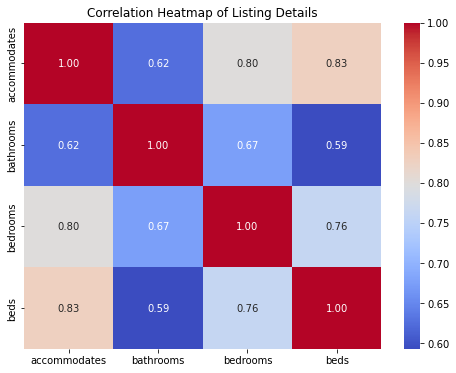

In [32]:
listing_details_vars = [
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds'
]

plt.figure(figsize=(8, 6))
sns.heatmap(df[listing_details_vars].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Listing Details')
plt.show()

# Heatmap for Host Details to Identify Correlation

Text(0.5, 1.0, 'Correlation Heatmap of Host Information')

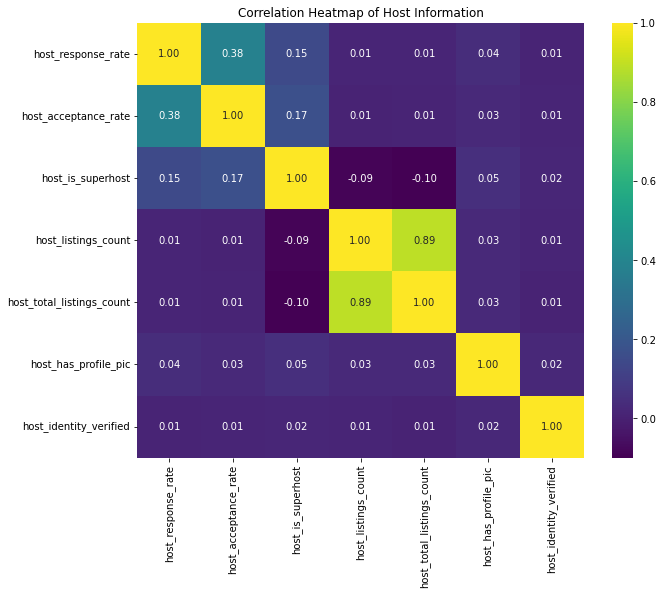

In [33]:
host_info_vars = [
    'host_response_rate',
    'host_acceptance_rate',
    'host_is_superhost',
    'host_listings_count',
    'host_total_listings_count',
    'host_has_profile_pic',
    'host_identity_verified'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[host_info_vars].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Host Information')

In [34]:
# Here some Variable need to be dropped to multi-correlation
host_info_remove = [
    'host_listings_count',
]
df.drop(columns=host_info_remove, inplace=True)

# Heatmap for location to Identify Correlation

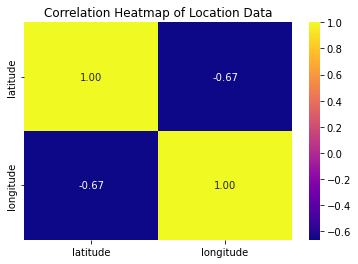

In [35]:
location_data_vars = [
    'latitude',
    'longitude'
]

plt.figure(figsize=(6, 4))
sns.heatmap(df[location_data_vars].corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap of Location Data')
plt.show()

# Heatmap for pricing to Identify Correlation

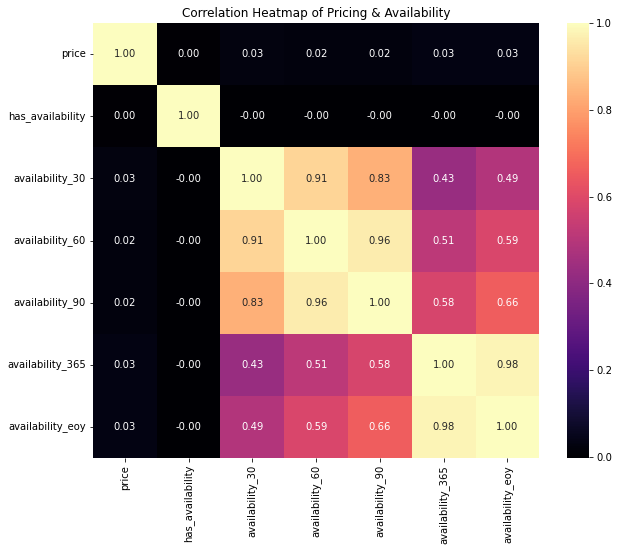

In [36]:
pricing_availability_vars = [
    'price',
    'has_availability',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'availability_eoy'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[pricing_availability_vars].corr(), annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Heatmap of Pricing & Availability')
plt.show()

In [37]:
# Here some Variable need to be dropped to multi-correlation
pricing_availability_remove = [
    'availability_60',
    'availability_90',
    'availability_eoy'
]

df.drop(columns=pricing_availability_remove, inplace=True)

# Heatmap for Reviews to Identify Correlation

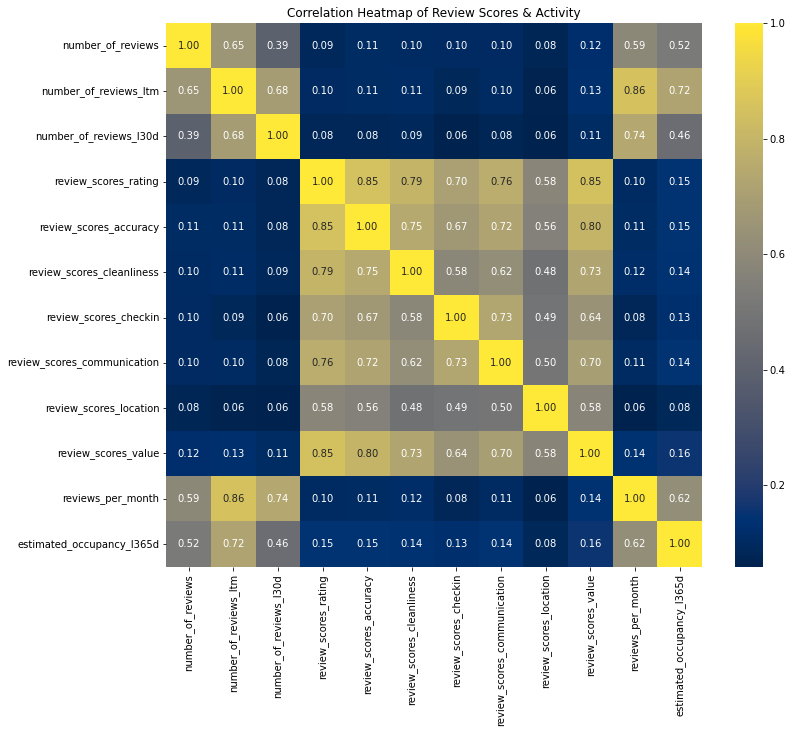

In [38]:
review_activity_vars = [
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month',
    'estimated_occupancy_l365d',
]

plt.figure(figsize=(12, 10))
sns.heatmap(df[review_activity_vars].corr(), annot=True, cmap='cividis', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores & Activity')
plt.show()

In [39]:
# Here some Variable need to be dropped to multi-correlation
review_activity_remove = [
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_value',
]

df.drop(columns=review_activity_remove, inplace=True)

# Visualization of Price of Properties 

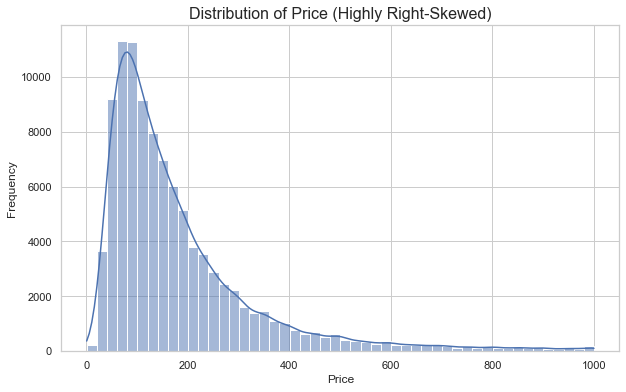

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a histogram to visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Price (Highly Right-Skewed)', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualization of Estimated Occupancy in last 365 Days 

Generating plot to visualize skewness...


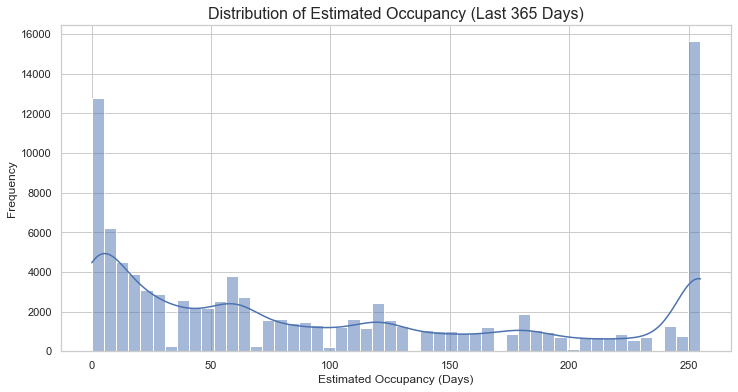

In [41]:
# b) Visualize the distribution
print("Generating plot to visualize skewness...")
plt.figure(figsize=(12, 6))
sns.histplot(df['estimated_occupancy_l365d'], kde=True, bins=50)
plt.title('Distribution of Estimated Occupancy (Last 365 Days)', fontsize=16)
plt.xlabel('Estimated Occupancy (Days)')
plt.ylabel('Frequency')
plt.show()

# Transformation for price
To Remove the Skewness from both the Output we apply **Box-Cox Transformation**


Text(0.5, 1.0, 'Transformed Price Distribution (Box-Cox)')

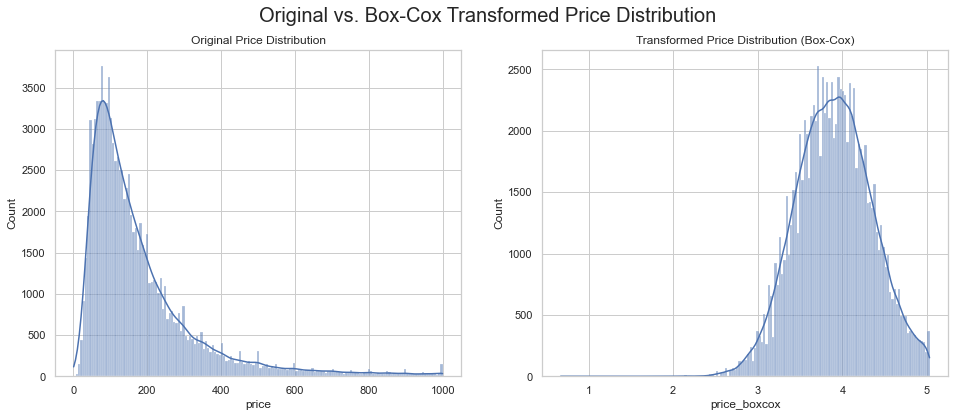

In [42]:
from scipy.stats import boxcox
price_positive = df['price'] + 1
transformed_price, best_lambda_price = boxcox(price_positive)
df['price_boxcox'] = transformed_price

# --- 4. Visualize the Transformed Price Distribution ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Original vs. Box-Cox Transformed Price Distribution', fontsize=20)

# Plot original price
sns.histplot(df['price'], kde=True, ax=axes[0])
axes[0].set_title('Original Price Distribution')

# Plot transformed price
sns.histplot(df['price_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Transformed Price Distribution (Box-Cox)')

# Modeling 

In [43]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,review_scores_location,reviews_per_month,host_tenure_days,host_verifications_count,property_grouped_encoded,bathrooms_count,bathroom_type_encoded,room_type_encoded,wifi,kitchen,hot water,hair dryer,dishes and silverware,essentials,hangers,bed linens,iron,refrigerator,cooking basics,smoke alarm,microwave,shampoo,self check-in,fire extinguisher,tv,dedicated workspace,heating,hot water kettle,city_Albany,city_Amsterdam,city_Asheville,city_Austin,city_Barcelona,city_Bologna,city_Bordeaux,city_Boston,city_Bozeman,city_Brisbane,city_Brussels,city_Chicago,"city_Clark County, NV",city_Dallas,city_Dublin,city_Edinburgh,city_Florence,city_Fort Worth,city_Hawaii,city_Hong Kong,city_Lisbon,city_Los Angeles,city_Lyon,city_Madrid,city_Mallorca,city_Melbourne,city_Mid North Coast,city_Milan,city_Montreal,city_Mornington Peninsula,city_Naples,city_Nashville,city_New Orleans,city_New York City,city_Northern Rivers,city_Ottawa,city_Portland,city_Porto,city_Prague,city_Quebec City,city_Rochester,city_San Francisco,city_Sunshine Coast,city_Sydney,city_Tasmania,city_Toronto,city_Twin Cities MSA,city_Valencia,city_Vancouver,city_Vaud,city_Venice,city_Victoria,city_Vienna,"city_Washington, D.C",city_Winnipeg,days_between_reviews,price_boxcox
0,1.0,100.0,88.0,0.0,2.0,1.0,1.0,42.650468,-73.764348,2,1.0,1.0,1.0,82.0,1,0,286,2,2,0,2.0,12.0,5.00,5.00,0.44,374.0,2,0.0,1.0,0.0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,3.591547
1,4.0,90.0,57.0,0.0,2.0,1.0,1.0,42.662460,-73.765760,1,1.0,1.0,2.0,36.0,1,30,363,26,10,1,12.0,60.0,4.73,4.12,1.23,1030.0,1,0.0,1.0,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,622,3.044760
3,1.0,100.0,97.0,1.0,2.0,1.0,1.0,42.660870,-73.786550,11,2.0,5.0,6.0,237.0,1,20,74,49,19,0,20.0,114.0,4.88,4.80,2.36,657.0,2,2.0,2.0,0.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,587,4.242881
4,1.0,100.0,99.0,0.0,10.0,1.0,1.0,42.645349,-73.753647,12,3.0,4.0,4.0,193.0,1,19,336,49,38,0,39.0,228.0,4.80,4.61,2.99,3463.0,2,0.0,3.0,0.0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,455,4.121658
5,1.0,100.0,97.0,1.0,1.0,1.0,1.0,42.660100,-73.807190,2,1.0,1.0,1.0,72.0,1,16,249,56,19,0,21.0,114.0,4.88,4.95,2.12,2132.0,2,2.0,1.0,0.0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759,3.507508


In [44]:
df.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,review_scores_location,reviews_per_month,host_tenure_days,host_verifications_count,property_grouped_encoded,bathrooms_count,bathroom_type_encoded,room_type_encoded,wifi,kitchen,hot water,hair dryer,dishes and silverware,essentials,hangers,bed linens,iron,refrigerator,cooking basics,smoke alarm,microwave,shampoo,self check-in,fire extinguisher,tv,dedicated workspace,heating,hot water kettle,city_Albany,city_Amsterdam,city_Asheville,city_Austin,city_Barcelona,city_Bologna,city_Bordeaux,city_Boston,city_Bozeman,city_Brisbane,city_Brussels,city_Chicago,"city_Clark County, NV",city_Dallas,city_Dublin,city_Edinburgh,city_Florence,city_Fort Worth,city_Hawaii,city_Hong Kong,city_Lisbon,city_Los Angeles,city_Lyon,city_Madrid,city_Mallorca,city_Melbourne,city_Mid North Coast,city_Milan,city_Montreal,city_Mornington Peninsula,city_Naples,city_Nashville,city_New Orleans,city_New York City,city_Northern Rivers,city_Ottawa,city_Portland,city_Porto,city_Prague,city_Quebec City,city_Rochester,city_San Francisco,city_Sunshine Coast,city_Sydney,city_Tasmania,city_Toronto,city_Twin Cities MSA,city_Valencia,city_Vancouver,city_Vaud,city_Venice,city_Victoria,city_Vienna,"city_Washington, D.C",city_Winnipeg,days_between_reviews,price_boxcox
count,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.00000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.00000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000
mean,3.430979,97.346606,90.471491,0.427928,74.978079,0.976350,0.934944,28.689631,-21.427850,4.023103,1.405282,1.660738,2.347371,182.520400,0.99993,13.169353,194.674480,64.624429,16.242836,1.022666,15.919671,102.830756,4.746536,4.783850,1.661233,2681.653861,2.05195,0.844032,1.403350,0.265173,0.215072,0.898595,0.897363,0.870732,0.844121,0.824377,0.823155,0.813973,0.784143,0.775865,0.764051,0.752196,0.742160,0.739159,0.641639,0.576970,0.570432,0.548829,0.545093,0.530337,0.526402,0.000805,0.013842,0.006499,0.023968,0.032344,0.009390,0.016744,0.007522,0.001222,0.011169,0.013127,0.016326,0.025786,0.011626,0.011159,0.011676,0.026174,0.003875,0.064927,0.006270,0.049137,0.069577,0.012004,0.043195,0.026690,0.042351,0.010056,0.033030,0.018949,0.009172,0.018959,0.016276,0.014607,0.041218,0.011904,0.005704,0.009052,0.030069,0.003100,0.004849,0.002156,0.01

In [45]:
# --- Identify types of features ---
continuous_features = []
binary_features = []
categorical_encoded_features = []

for col in df.columns:
    unique_vals = df[col].nunique()
    dtype = df[col].dtype

    if np.issubdtype(dtype, np.number):
        if unique_vals == 2:
            binary_features.append(col)  # 0/1 or True/False
        elif unique_vals > 2:
            continuous_features.append(col)  # numerical continuous
    else:
        categorical_encoded_features.append(col)  # non-numeric

# Identify one-hot encoded city variables
city_one_hot_features = [col for col in df.columns if col.startswith('city_')]

# Remove city_* columns from binary_features
binary_features_cleaned = [col for col in binary_features if not col.startswith("city_")]

# Print results
print(f"Continuous ({len(continuous_features)}): {continuous_features}")
print(f"Binary ({len(binary_features_cleaned)}): {binary_features_cleaned}")
print(f"Categorical Encoded ({len(categorical_encoded_features)}): {categorical_encoded_features}")
print(f"City one-hot ({len(city_one_hot_features)}): {city_one_hot_features}")


Continuous (29): ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'availability_30', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'review_scores_rating', 'review_scores_location', 'reviews_per_month', 'host_tenure_days', 'host_verifications_count', 'property_grouped_encoded', 'bathrooms_count', 'bathroom_type_encoded', 'room_type_encoded', 'days_between_reviews', 'price_boxcox']
Binary (24): ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'wifi', 'kitchen', 'hot water', 'hair dryer', 'dishes and silverware', 'essentials', 'hangers', 'bed linens', 'iron', 'refrigerator', 'cooking basics', 'smoke alarm', 'microwave', 'shampoo', 'self check-in', 'fire extinguisher', 'tv', 'dedicated workspace', 'heating', 'hot water k

In [46]:
# Correlation of continuous features with target
target = 'estimated_occupancy_l365d'

corr_continuous = (
    df[continuous_features]
    .corr()[target]
    .sort_values(ascending=False)
)

print(corr_continuous)


estimated_occupancy_l365d    1.000000
number_of_reviews_ltm        0.719840
number_of_reviews_ly         0.716631
reviews_per_month            0.617632
number_of_reviews            0.519705
number_of_reviews_l30d       0.457346
host_acceptance_rate         0.243233
days_between_reviews         0.231553
review_scores_rating         0.145491
host_response_rate           0.135171
latitude                     0.088348
review_scores_location       0.084747
host_tenure_days             0.023988
host_verifications_count    -0.010114
accommodates                -0.029014
beds                        -0.038965
property_grouped_encoded    -0.042802
bathroom_type_encoded       -0.056931
bedrooms                    -0.061971
longitude                   -0.063309
availability_365            -0.073811
bathrooms                   -0.074356
bathrooms_count             -0.074869
room_type_encoded           -0.084411
host_total_listings_count   -0.103302
price_boxcox                -0.121047
availability

In [47]:
from sklearn.feature_selection import VarianceThreshold

# --- Step 1: Low variance filter ---
# Binary features
binary_low_var_thresh = 0.01
selector_bin = VarianceThreshold(threshold=binary_low_var_thresh)
selector_bin.fit(df[binary_features])
binary_low_var_features = [binary_features[i] for i in range(len(binary_features)) if selector_bin.variances_[i] <= binary_low_var_thresh]

# City one-hot features
city_low_var_thresh = 0.01
selector_city = VarianceThreshold(threshold=city_low_var_thresh)
selector_city.fit(df[city_one_hot_features])
city_low_var_features = [city_one_hot_features[i] for i in range(len(city_one_hot_features)) if selector_city.variances_[i] <= city_low_var_thresh]

print(f"Low variance binary features: {binary_low_var_features}")
print(f"Low variance city features: {city_low_var_features}")

# --- Step 2: Correlation filter for continuous ---
corr_threshold = 0.05
continuous_corr = df[continuous_features].corr()['estimated_occupancy_l365d']
low_corr_continuous = continuous_corr[continuous_corr.abs() < corr_threshold].index.tolist()

print(f"Low correlation continuous features: {low_corr_continuous}")


Low variance binary features: ['has_availability', 'city_Albany', 'city_Asheville', 'city_Bologna', 'city_Boston', 'city_Bozeman', 'city_Fort Worth', 'city_Hong Kong', 'city_Mid North Coast', 'city_Mornington Peninsula', 'city_Ottawa', 'city_Portland', 'city_Prague', 'city_Quebec City', 'city_Rochester', 'city_Vancouver', 'city_Vaud', 'city_Victoria', 'city_Winnipeg']
Low variance city features: ['city_Albany', 'city_Asheville', 'city_Bologna', 'city_Boston', 'city_Bozeman', 'city_Fort Worth', 'city_Hong Kong', 'city_Mid North Coast', 'city_Mornington Peninsula', 'city_Ottawa', 'city_Portland', 'city_Prague', 'city_Quebec City', 'city_Rochester', 'city_Vancouver', 'city_Vaud', 'city_Victoria', 'city_Winnipeg']
Low correlation continuous features: ['accommodates', 'beds', 'host_tenure_days', 'host_verifications_count', 'property_grouped_encoded']


In [48]:
# Step 1: Low variance features (combine & deduplicate)
low_variance_features = list(set([
    'has_availability',
    'city_Albany', 'city_Asheville', 'city_Bologna', 'city_Boston',
    'city_Bozeman', 'city_Fort Worth', 'city_Hong Kong', 'city_Mid North Coast',
    'city_Mornington Peninsula', 'city_Ottawa', 'city_Portland', 'city_Prague',
    'city_Quebec City', 'city_Rochester', 'city_Vancouver', 'city_Vaud',
    'city_Victoria', 'city_Winnipeg'
]))

# Step 2: Low correlation continuous features
low_corr_continuous_features = [
    'accommodates', 'beds', 'host_tenure_days',
    'host_verifications_count', 'property_grouped_encoded'
]

# Step 3: Store your feature groups for modeling
feature_groups = {
    "continuous": continuous_features,
    "binary": binary_features,
    "city_one_hot": city_one_hot_features,
    "categorical_encoded": categorical_encoded_features,
    "low_variance": low_variance_features,
    "low_corr_continuous": low_corr_continuous_features
}

# Step 4: Option to create reduced feature set
reduced_features = [
    col for col in df.columns
    if col not in low_variance_features + low_corr_continuous_features
]

print(f"Full feature count: {len(df.columns)}")
print(f"Reduced feature count: {len(reduced_features)}")
print("\nLow variance features:", low_variance_features)
print("\nLow correlation continuous features:", low_corr_continuous_features)


Full feature count: 108
Reduced feature count: 84

Low variance features: ['city_Prague', 'city_Vancouver', 'city_Mid North Coast', 'city_Winnipeg', 'city_Bologna', 'city_Rochester', 'city_Fort Worth', 'city_Albany', 'city_Vaud', 'city_Quebec City', 'city_Hong Kong', 'city_Mornington Peninsula', 'city_Portland', 'has_availability', 'city_Bozeman', 'city_Boston', 'city_Asheville', 'city_Ottawa', 'city_Victoria']

Low correlation continuous features: ['accommodates', 'beds', 'host_tenure_days', 'host_verifications_count', 'property_grouped_encoded']


In [49]:
# Assuming df is your current training DataFrame
low_variance_features = ['city_Prague', 'city_Boston', 'city_Vaud', 'city_Portland', 'city_Rochester',
                         'city_Winnipeg', 'city_Mid North Coast', 'city_Asheville', 'city_Bozeman',
                         'city_Victoria', 'city_Fort Worth', 'city_Mornington Peninsula', 'city_Hong Kong',
                         'city_Quebec City', 'has_availability', 'city_Vancouver', 'city_Albany', 
                         'city_Ottawa', 'city_Bologna']

low_corr_continuous_features = ['accommodates', 'beds', 'host_tenure_days', 
                                 'host_verifications_count', 'property_grouped_encoded']

# Combine all features to drop
features_to_drop = low_variance_features + low_corr_continuous_features

# Create reduced DataFrame
reduced_df = df.drop(columns=features_to_drop)

print(f"Reduced DataFrame shape: {reduced_df.shape}")

# Keep only binary features that survived feature reduction
binary_features_reduced = [f for f in binary_features if f in reduced_df.columns]

# Calculate correlation with target
binary_corr = reduced_df[binary_features_reduced].corrwith(reduced_df['estimated_occupancy_l365d'])

# Sort correlations in descending order
binary_corr_sorted = binary_corr.sort_values(key=abs, ascending=False)

print("Binary features correlation with target (reduced set):")
print(binary_corr_sorted)


Reduced DataFrame shape: (100636, 84)
Binary features correlation with target (reduced set):
host_is_superhost         0.336853
hot water                 0.199981
dishes and silverware     0.182494
hangers                   0.171257
bed linens                0.162451
hair dryer                0.157355
cooking basics            0.153464
essentials                0.148662
hot water kettle          0.147974
self check-in             0.147675
microwave                 0.143330
iron                      0.118650
shampoo                   0.110966
tv                       -0.098500
refrigerator              0.098154
wifi                     -0.084673
city_Hawaii              -0.072735
fire extinguisher         0.071838
city_Mallorca            -0.069231
dedicated workspace       0.065460
city_New Orleans          0.053517
city_Edinburgh            0.053035
smoke alarm               0.050253
city_Barcelona            0.047298
city_Montreal             0.046155
host_identity_verified    0.0447

In [50]:
# Keep only continuous features that survived the reduction
continuous_features_reduced = [f for f in continuous_features if f in reduced_df.columns]

# Keep only binary features that survived the reduction
binary_features_reduced = [f for f in binary_features if f in reduced_df.columns]

# --- Continuous correlations ---
cont_corr = reduced_df[continuous_features_reduced].corrwith(reduced_df['estimated_occupancy_l365d'])

# --- Binary correlations ---
binary_corr = reduced_df[binary_features_reduced].corrwith(reduced_df['estimated_occupancy_l365d'])

# --- Combine into one DataFrame ---
all_corr = pd.concat([cont_corr, binary_corr], axis=0).reset_index()
all_corr.columns = ['feature', 'correlation']

# Add absolute correlation for sorting
all_corr['abs_corr'] = all_corr['correlation'].abs()

# Sort by absolute correlation
all_corr_sorted = all_corr.sort_values(by='abs_corr', ascending=False).drop(columns='abs_corr')

# View top 20
print(all_corr_sorted.head(20))


                      feature  correlation
15  estimated_occupancy_l365d     1.000000
12      number_of_reviews_ltm     0.719840
14       number_of_reviews_ly     0.716631
18          reviews_per_month     0.617632
11          number_of_reviews     0.519705
13     number_of_reviews_l30d     0.457346
24          host_is_superhost     0.336853
2        host_acceptance_rate     0.243233
22       days_between_reviews     0.231553
29                  hot water     0.199981
31      dishes and silverware     0.182494
33                    hangers     0.171257
34                 bed linens     0.162451
30                 hair dryer     0.157355
37             cooking basics     0.153464
32                 essentials     0.148662
46           hot water kettle     0.147974
41              self check-in     0.147675
16       review_scores_rating     0.145491
8                       price    -0.144095


Top drivers of estimated_occupancy_l365d are almost entirely review-related features (number_of_reviews_*, reviews_per_month), followed by host behavior (host_is_superhost, host_acceptance_rate, days_between_reviews) and some amenities (hot water, dishes and silverware, hangers, etc.).

Price is negatively correlated (-0.144) — higher prices tend to have lower occupancy, which makes sense.

 we can now do this same process for the city one-hot features separately, because their correlation values will be much smaller but still may have predictive power.

In [51]:
# Keep only city features present in reduced_df
city_one_hot_features_reduced = [c for c in city_one_hot_features if c in reduced_df.columns]

# Calculate correlation
city_corr = reduced_df[city_one_hot_features_reduced].corrwith(reduced_df['estimated_occupancy_l365d'])
city_corr = city_corr.sort_values(key=abs, ascending=False)

print("City features correlation with target:")
print(city_corr)


City features correlation with target:
city_Hawaii             -0.072735
city_Mallorca           -0.069231
city_New Orleans         0.053517
city_Edinburgh           0.053035
city_Barcelona           0.047298
city_Montreal            0.046155
city_Madrid              0.040535
city_Melbourne          -0.037830
city_Venice              0.035526
city_Nashville           0.034922
city_Northern Rivers    -0.033719
city_Bordeaux           -0.033658
city_Washington, D.C     0.033316
city_Sydney             -0.032350
city_Naples             -0.028404
city_San Francisco       0.028113
city_Florence            0.027266
city_Sunshine Coast     -0.024194
city_Milan              -0.023279
city_Chicago             0.021417
city_Amsterdam          -0.021171
city_Toronto             0.014018
city_Clark County, NV    0.012312
city_Lisbon              0.008592
city_Tasmania            0.008441
city_Vienna             -0.007414
city_Austin             -0.005600
city_Valencia            0.003465
city_New 

From a modelling perspective:

City variables here are likely acting as minor location-based adjustments rather than major predictors.

Strongest signals are city_Hawaii (negative) and city_Mallorca (negative), but still only around −0.07.

This means for most models, the impact of city dummies might be marginal unless they interact with other variables.

If we keep them:

They could still be useful in tree-based models (because interactions can be captured).

In linear models, we might drop some of these to reduce dimensionality without losing much predictive power.

If we drop them:

We simplify the dataset and avoid adding many low-importance features.

keeping them for now in the reduced set but marking them as low-importance so we can test model performance with and without them later.

In [52]:
# Combine correlations and drop duplicates
all_corr_df = pd.concat([
    cont_corr.rename("correlation"),
    binary_corr.rename("correlation"),
    city_corr.rename("correlation")
]).reset_index()

all_corr_df.columns = ["feature", "correlation"]

# Drop duplicates keeping the first occurrence
all_corr_df = all_corr_df.drop_duplicates(subset="feature", keep="first")

# Drop the target itself if present
all_corr_df = all_corr_df[all_corr_df["feature"] != "estimated_occupancy_l365d"]

# Sort by absolute correlation
all_corr_df = all_corr_df.reindex(all_corr_df["correlation"].abs().sort_values(ascending=False).index)

print(all_corr_df)


                   feature  correlation
12   number_of_reviews_ltm     0.719840
14    number_of_reviews_ly     0.716631
18       reviews_per_month     0.617632
11       number_of_reviews     0.519705
13  number_of_reviews_l30d     0.457346
..                     ...          ...
73              city_Porto    -0.001241
62               city_Lyon    -0.001198
55             city_Dallas     0.000922
52           city_Brussels    -0.000736
61        city_Los Angeles     0.000130

[83 rows x 2 columns]


In [53]:
# Create a mapping of feature types
feature_type_map = {}
for f in continuous_features:
    feature_type_map[f] = "continuous"
for f in binary_features:
    feature_type_map[f] = "binary"
for f in city_one_hot_features:
    feature_type_map[f] = "city_one_hot"

# Add type column to correlation DataFrame
all_corr_df['feature_type'] = all_corr_df['feature'].map(feature_type_map)

# Preview
all_corr_df.sort_values(by='correlation', key=abs, ascending=False)


,feature,correlation,feature_type
12,number_of_reviews_ltm,0.719840,continuous
14,number_of_reviews_ly,0.716631,continuous
18,reviews_per_month,0.617632,continuous
11,number_of_reviews,0.519705,continuous
13,number_of_reviews_l30d,0.457346,continuous
...,...,...,...
73,city_Porto,-0.001241,city_one_hot
62,city_Lyon,-0.001198,city_one_hot
55,city_Dallas,0.000922,city_one_hot
52,city_Brussels,-0.000736,city_one_hot


In [54]:
# Drop the 'number_of_reviews_ltm' column from the DataFrame
df.drop(columns=['number_of_reviews_ltm'], inplace=True)

In [55]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,review_scores_location,reviews_per_month,host_tenure_days,host_verifications_count,property_grouped_encoded,bathrooms_count,bathroom_type_encoded,room_type_encoded,wifi,kitchen,hot water,hair dryer,dishes and silverware,essentials,hangers,bed linens,iron,refrigerator,cooking basics,smoke alarm,microwave,shampoo,self check-in,fire extinguisher,tv,dedicated workspace,heating,hot water kettle,city_Albany,city_Amsterdam,city_Asheville,city_Austin,city_Barcelona,city_Bologna,city_Bordeaux,city_Boston,city_Bozeman,city_Brisbane,city_Brussels,city_Chicago,"city_Clark County, NV",city_Dallas,city_Dublin,city_Edinburgh,city_Florence,city_Fort Worth,city_Hawaii,city_Hong Kong,city_Lisbon,city_Los Angeles,city_Lyon,city_Madrid,city_Mallorca,city_Melbourne,city_Mid North Coast,city_Milan,city_Montreal,city_Mornington Peninsula,city_Naples,city_Nashville,city_New Orleans,city_New York City,city_Northern Rivers,city_Ottawa,city_Portland,city_Porto,city_Prague,city_Quebec City,city_Rochester,city_San Francisco,city_Sunshine Coast,city_Sydney,city_Tasmania,city_Toronto,city_Twin Cities MSA,city_Valencia,city_Vancouver,city_Vaud,city_Venice,city_Victoria,city_Vienna,"city_Washington, D.C",city_Winnipeg,days_between_reviews,price_boxcox
0,1.0,100.0,88.0,0.0,2.0,1.0,1.0,42.650468,-73.764348,2,1.0,1.0,1.0,82.0,1,0,286,2,0,2.0,12.0,5.00,5.00,0.44,374.0,2,0.0,1.0,0.0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,3.591547
1,4.0,90.0,57.0,0.0,2.0,1.0,1.0,42.662460,-73.765760,1,1.0,1.0,2.0,36.0,1,30,363,26,1,12.0,60.0,4.73,4.12,1.23,1030.0,1,0.0,1.0,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,622,3.044760
3,1.0,100.0,97.0,1.0,2.0,1.0,1.0,42.660870,-73.786550,11,2.0,5.0,6.0,237.0,1,20,74,49,0,20.0,114.0,4.88,4.80,2.36,657.0,2,2.0,2.0,0.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,587,4.242881
4,1.0,100.0,99.0,0.0,10.0,1.0,1.0,42.645349,-73.753647,12,3.0,4.0,4.0,193.0,1,19,336,49,0,39.0,228.0,4.80,4.61,2.99,3463.0,2,0.0,3.0,0.0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,455,4.121658
5,1.0,100.0,97.0,1.0,1.0,1.0,1.0,42.660100,-73.807190,2,1.0,1.0,1.0,72.0,1,16,249,56,0,21.0,114.0,4.88,4.95,2.12,2132.0,2,2.0,1.0,0.0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759,3.507508


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming 'df' and 'all_corr_df' are available in your environment.

# 1. Define the target variable
target = 'estimated_occupancy_l365d'

# 2. Extract features from the all_corr_df and filter out the target and 'number_of_reviews_ltm'
features_from_corr_df = all_corr_df['feature'].tolist()
features = [f for f in features_from_corr_df if f not in [target, 'number_of_reviews_ltm']]

# 3. Separate features (X) and target (y)
X = df[features]
y = df[target]

# 4. Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 7. Evaluate the model using the R-squared score
r2 = r2_score(y_test, y_pred)

print("Features used for modeling:", features)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nR-squared score of the Random Forest Regressor:", r2)

Features used for modeling: ['number_of_reviews_ly', 'reviews_per_month', 'number_of_reviews', 'number_of_reviews_l30d', 'host_is_superhost', 'host_acceptance_rate', 'days_between_reviews', 'hot water', 'dishes and silverware', 'hangers', 'bed linens', 'hair dryer', 'cooking basics', 'essentials', 'hot water kettle', 'self check-in', 'review_scores_rating', 'price', 'microwave', 'host_response_time', 'host_response_rate', 'availability_30', 'price_boxcox', 'iron', 'shampoo', 'host_total_listings_count', 'tv', 'refrigerator', 'latitude', 'review_scores_location', 'wifi', 'room_type_encoded', 'bathrooms_count', 'bathrooms', 'availability_365', 'city_Hawaii', 'fire extinguisher', 'city_Mallorca', 'dedicated workspace', 'longitude', 'bedrooms', 'bathroom_type_encoded', 'city_New Orleans', 'city_Edinburgh', 'smoke alarm', 'city_Barcelona', 'city_Montreal', 'host_identity_verified', 'host_has_profile_pic', 'city_Madrid', 'city_Melbourne', 'city_Venice', 'city_Nashville', 'city_Northern River

--- Model Accuracy Metrics ---
Mean Absolute Error (MAE): 19.1720
Mean Squared Error (MSE): 1268.8958
Root Mean Squared Error (RMSE): 35.6216


--- Top 10 Most Important Features ---
                      feature  importance
0        number_of_reviews_ly    0.754702
39                  longitude    0.037280
1           reviews_per_month    0.019677
6        days_between_reviews    0.016604
28                   latitude    0.015037
34           availability_365    0.012415
2           number_of_reviews    0.011540
22               price_boxcox    0.011288
17                      price    0.011200
25  host_total_listings_count    0.010996


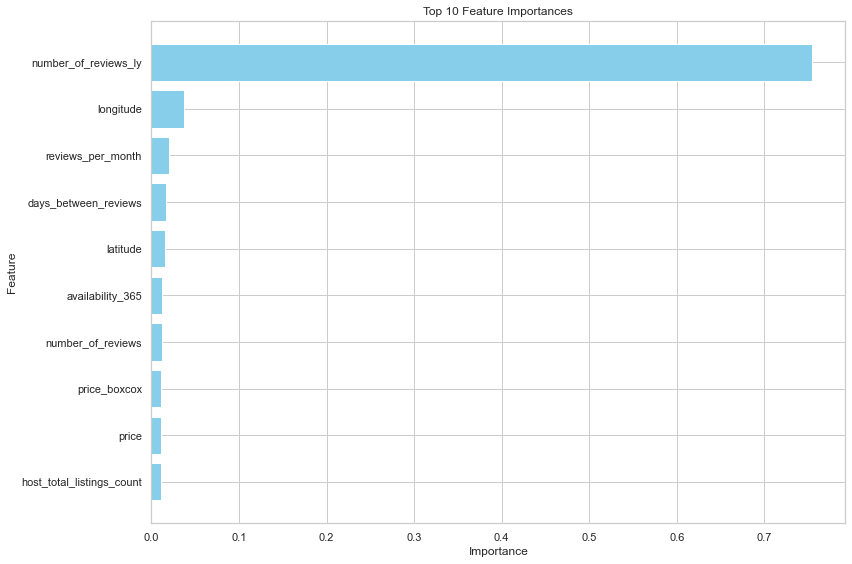

In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'rf_model', 'X_test', 'y_test' and 'X_train' are available from the previous steps.
# The `y_pred` from the previous step is also required.

# Calculate additional evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("--- Model Accuracy Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print("\n")

# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# Display the top 10 most important features
print("--- Top 10 Most Important Features ---")
print(feature_importances_df.head(10))

# Optional: Visualize the top 10 most important features
plt.figure(figsize=(12, 8))
plt.title('Top 10 Feature Importances')
plt.barh(
    feature_importances_df['feature'].head(10),
    feature_importances_df['importance'].head(10),
    color='skyblue'
)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show() # Use plt.show() to display the chart locally

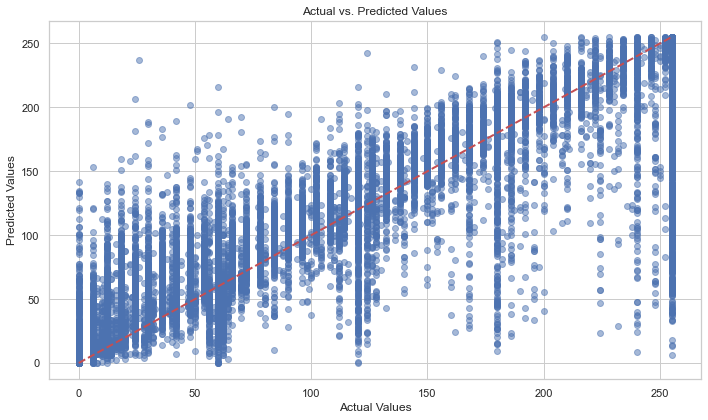

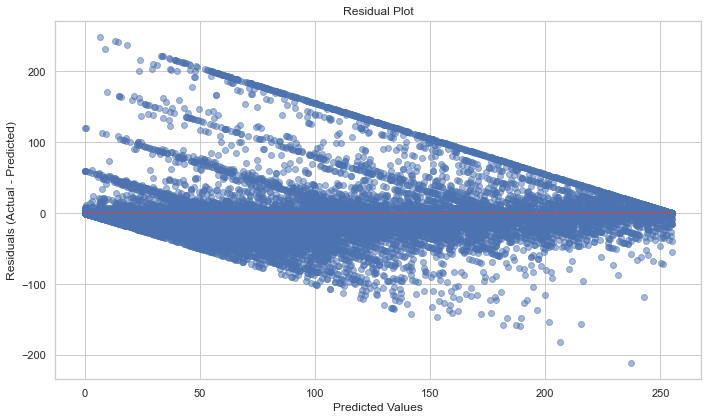

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_test' and 'y_pred' are available from the previous steps.

# 1. Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted_plot.png')

# 2. Plotting Residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.savefig('residuals_plot.png')

## XGBOOST

In [59]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming 'df' and 'all_corr_df' are available.

# 1. Define the target variable and features
target = 'estimated_occupancy_l365d'
features_from_corr_df = all_corr_df['feature'].tolist()
features = [
    f for f in features_from_corr_df
    if f not in [target, 'number_of_reviews_ltm', 'number_of_reviews_ly']
]

# 2. Separate features (X) and target (y)
X = df[features]
y = df[target]

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# 5. Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# 6. Evaluate the new model
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# 7. Print the new metrics
print("--- XGBoost Model Metrics (without 'number_of_reviews_ly') ---")
print(f"R-squared score: {r2_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")

--- XGBoost Model Metrics (without 'number_of_reviews_ly') ---
R-squared score: 0.7520
Mean Absolute Error (MAE): 29.6862
Root Mean Squared Error (RMSE): 46.0213


In [60]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming 'df', 'all_corr_df' and 'y_train' are available from your session.

# Define the target variable and features (without leaky features)
target = 'estimated_occupancy_l365d'
features_from_corr_df = all_corr_df['feature'].tolist()
full_features = [
    f for f in features_from_corr_df
    if f not in [target, 'number_of_reviews_ltm', 'number_of_reviews_ly']
]

# Separate features (X) and target (y)
X_full = df[full_features]
y = df[target]

# Split the data to get X_train_full for feature importance
X_train_full, _, _, _ = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Train a temporary XGBoost model to get feature importance
xgb_model_temp = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model_temp.fit(X_train_full, y_train)

# Get feature importances and select the top 10
importances = xgb_model_temp.feature_importances_
feature_importances_df = pd.DataFrame({
    'feature': X_train_full.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

top_10_features = feature_importances_df['feature'].head(10).tolist()
print("Top 10 features based on XGBoost importance:")
print(top_10_features)

# Create the reduced feature set DataFrame
X_reduced = df[top_10_features]

print("\nShape of the new DataFrame with reduced features:")
print(X_reduced.shape)

Top 10 features based on XGBoost importance:
['reviews_per_month', 'number_of_reviews', 'host_is_superhost', 'city_Barcelona', 'number_of_reviews_l30d', 'city_Bordeaux', 'city_New York City', 'city_New Orleans', 'city_Twin Cities MSA', 'cooking basics']

Shape of the new DataFrame with reduced features:
(100636, 10)


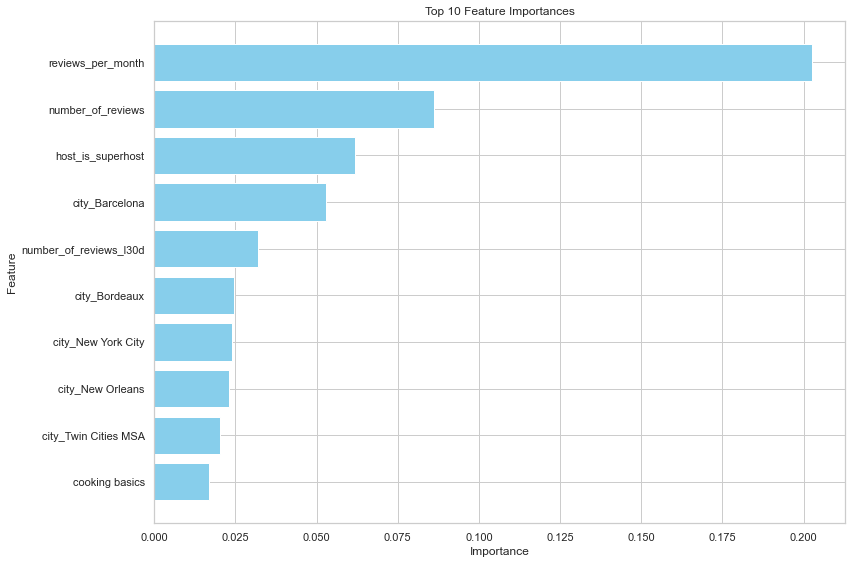

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'feature_importances_df' is available from your previous code execution.

# Plot the top 10 feature importances
plt.figure(figsize=(12, 8))
plt.title('Top 10 Feature Importances')
plt.barh(
    feature_importances_df['feature'].head(10),
    feature_importances_df['importance'].head(10),
    color='skyblue'
)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_10_feature_importances.png')

In [62]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming 'df' and the list 'top_10_features' are available from your session.

# 1. Define the target and the reduced feature set
target = 'estimated_occupancy_l365d'
top_10_features = ['reviews_per_month', 'number_of_reviews', 'host_is_superhost', 'city_Barcelona', 'number_of_reviews_l30d', 'city_Bordeaux', 'city_New York City', 'city_New Orleans', 'city_Twin Cities MSA', 'cooking basics']

# 2. Separate features (X) and target (y)
X_reduced = df[top_10_features]
y = df[target]

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 4. Train a new XGBoost model
xgb_model_final = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model_final.fit(X_train, y_train)

# 5. Make predictions
y_pred_final = xgb_model_final.predict(X_test)

# 6. Evaluate the model
r2_final = r2_score(y_test, y_pred_final)
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))

# 7. Print the final metrics
print("--- Final XGBoost Model Metrics (with top 10 features) ---")
print(f"R-squared score: {r2_final:.4f}")
print(f"Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:.4f}")

--- Final XGBoost Model Metrics (with top 10 features) ---
R-squared score: 0.6896
Mean Absolute Error (MAE): 33.6634
Root Mean Squared Error (RMSE): 51.4872


In [63]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming 'df', 'top_10_features', and 'y' are available from your session.

# Define the target and features
target = 'estimated_occupancy_l365d'
top_10_features = ['reviews_per_month', 'number_of_reviews', 'host_is_superhost', 'city_Barcelona', 'number_of_reviews_l30d', 'city_Bordeaux', 'city_New York City', 'city_New Orleans', 'city_Twin Cities MSA', 'cooking basics']
X_reduced = df[top_10_features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Define the XGBoost model and the hyperparameter grid
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

# Run the grid search to find the best hyperparameters
print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters found:")
print(best_params)
print(f"Best cross-validation R-squared score: {best_score:.4f}")

# Train the final, enhanced model with the best parameters
final_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
final_xgb_model.fit(X_train, y_train)

# Evaluate the final model
y_pred_final = final_xgb_model.predict(X_test)

r2_final = r2_score(y_test, y_pred_final)
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))

# Print the final metrics
print("\n--- Enhanced XGBoost Model Metrics ---")
print(f"R-squared score: {r2_final:.4f}")
print(f"Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:.4f}")

Starting GridSearchCV...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Best Hyperparameters found:
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100}
Best cross-validation R-squared score: 0.6845

--- Enhanced XGBoost Model Metrics ---
R-squared score: 0.6895
Mean Absolute Error (MAE): 33.8397
Root Mean Squared Error (RMSE): 51.5010


In [64]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming 'df' and 'all_corr_df' are available from your session.

# 1. Define the target variable and full feature set (without leaky features)
target = 'estimated_occupancy_l365d'
features_from_corr_df = all_corr_df['feature'].tolist()
full_features = [
    f for f in features_from_corr_df
    if f not in [target, 'number_of_reviews_ltm', 'number_of_reviews_ly']
]

# 2. Separate features (X) and target (y)
X_full = df[full_features]
y = df[target]

# 3. Split the data to train a temporary model for feature importance
X_train_full, _, y_train, _ = train_test_split(X_full, y, test_size=0.2, random_state=42)

# 4. Train a temporary XGBoost model to get feature importance
xgb_model_temp = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model_temp.fit(X_train_full, y_train)

# 5. Get feature importances
importances = xgb_model_temp.feature_importances_
feature_importances_df = pd.DataFrame({
    'feature': X_train_full.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# 6. Filter out all city features and 'number_of_reviews_l30d' and select the new top 10
excluded_features = ['number_of_reviews_l30d'] + [f for f in feature_importances_df['feature'] if f.startswith('city_')]
filtered_features_df = feature_importances_df[~feature_importances_df['feature'].isin(excluded_features)]
new_top_10_features = filtered_features_df['feature'].head(10).tolist()
print("New Top 10 features based on your criteria:")
print(new_top_10_features)

# 7. Re-run the model with this new feature set
X_new_reduced = df[new_top_10_features]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_reduced, y, test_size=0.2, random_state=42)

xgb_model_new = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model_new.fit(X_train_new, y_train_new)

y_pred_new = xgb_model_new.predict(X_test_new)

# 8. Evaluate the new model
r2_new = r2_score(y_test_new, y_pred_new)
mae_new = mean_absolute_error(y_test_new, y_pred_new)
rmse_new = np.sqrt(mean_squared_error(y_test_new, y_pred_new))

print("\n--- XGBoost Model Metrics (with new custom top 10 features) ---")
print(f"R-squared score: {r2_new:.4f}")
print(f"Mean Absolute Error (MAE): {mae_new:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_new:.4f}")

New Top 10 features based on your criteria:
['reviews_per_month', 'number_of_reviews', 'host_is_superhost', 'cooking basics', 'longitude', 'availability_30', 'latitude', 'days_between_reviews', 'room_type_encoded', 'price']

--- XGBoost Model Metrics (with new custom top 10 features) ---
R-squared score: 0.7357
Mean Absolute Error (MAE): 30.6819
Root Mean Squared Error (RMSE): 47.5120


In [65]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming 'df' is available from your session.

# 1. Start with the previously defined new top 10 features
new_top_10_features = [
    'reviews_per_month', 'number_of_reviews', 'host_is_superhost',
    'cooking basics', 'longitude', 'availability_30', 'latitude',
    'days_between_reviews', 'room_type_encoded', 'price'
]

# 2. Remove 'latitude' and 'longitude' as requested
final_features = [
    f for f in new_top_10_features if f not in ['latitude', 'longitude']
]
print("Final feature set for the new model:")
print(final_features)

# 3. Define the target variable
target = 'estimated_occupancy_l365d'

# 4. Separate features (X) and target (y) with the new feature set
X_final = df[final_features]
y = df[target]

# 5. Split the data
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 6. Train a new XGBoost model
xgb_model_final = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model_final.fit(X_train_final, y_train_final)

# 7. Make predictions
y_pred_final = xgb_model_final.predict(X_test_final)

# 8. Evaluate the new model
r2_final = r2_score(y_test_final, y_pred_final)
mae_final = mean_absolute_error(y_test_final, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test_final, y_pred_final))

# 9. Print the new metrics
print("\n--- XGBoost Model Metrics (with latitude and longitude removed) ---")
print(f"R-squared score: {r2_final:.4f}")
print(f"Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:.4f}")

Final feature set for the new model:
['reviews_per_month', 'number_of_reviews', 'host_is_superhost', 'cooking basics', 'availability_30', 'days_between_reviews', 'room_type_encoded', 'price']

--- XGBoost Model Metrics (with latitude and longitude removed) ---
R-squared score: 0.7024
Mean Absolute Error (MAE): 33.0771
Root Mean Squared Error (RMSE): 50.4191


In [67]:
df[['reviews_per_month', 'number_of_reviews', 'host_is_superhost', 'cooking basics', 'availability_30', 'days_between_reviews', 'room_type_encoded', 'price']].head()

,reviews_per_month,number_of_reviews,host_is_superhost,cooking basics,availability_30,days_between_reviews,room_type_encoded,price
0,0.44,2,0.0,1,0,9,0,82.0
1,1.23,26,0.0,1,30,622,1,36.0
3,2.36,49,1.0,1,20,587,0,237.0
4,2.99,49,0.0,1,19,455,0,193.0
5,2.12,56,1.0,0,16,759,0,72.0


In [68]:
df[['reviews_per_month', 'number_of_reviews', 'host_is_superhost', 'cooking basics', 'availability_30', 'days_between_reviews', 'room_type_encoded', 'price']].describe()

,reviews_per_month,number_of_reviews,host_is_superhost,cooking basics,availability_30,days_between_reviews,room_type_encoded,price
count,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000,100636.000000
mean,1.661233,64.624429,0.427928,0.752196,13.169353,1067.629029,0.215072,182.520400
std,1.881228,103.615523,0.494781,0.431740,10.533511,1078.571729,0.443957,155.653392
min,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.360000,6.000000,0.000000,1.000000,3.000000,205.000000,0.000000,82.000000
50%,1.060000,25.000000,0.000000,1.000000,12.000000,683.000000,0.000000,135.000000
75%,2.400000,77.000000,1.000000,1.000000,23.000000,1739.000000,0.000000,225.000000
max,80.450000,2350.000000,1.000000,1.000000,30.000000,5612.000000,3.000000,1000.000000


In [71]:
xgb_model_final

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [72]:
import pickle

pickle_file_name = 'xgb_demand_model_final.pkl'
with open(pickle_file_name, 'wb') as file:
    pickle.dump(xgb_model_final, file)

print(f"XGBoost model saved to '{pickle_file_name}' successfully.")

XGBoost model saved to 'xgb_demand_model_final.pkl' successfully.
